1. Perkenalan
-   Aldo Dwicahyo
-   Batch-004

2. Import Pustaka

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import plotly.express as px

3. Data loading

In [2]:
df = pd.read_csv('supermarket_sales - Sheet1.csv')

In [3]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


4. data manipulation

In [4]:
df['Date'] = df['Date'].astype('datetime64[ns]')
df['Time'] = df['Time'].astype('datetime64[ns]')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Invoice ID               1000 non-null   object        
 1   Branch                   1000 non-null   object        
 2   City                     1000 non-null   object        
 3   Customer type            1000 non-null   object        
 4   Gender                   1000 non-null   object        
 5   Product line             1000 non-null   object        
 6   Unit price               1000 non-null   float64       
 7   Quantity                 1000 non-null   int64         
 8   Tax 5%                   1000 non-null   float64       
 9   Total                    1000 non-null   float64       
 10  Date                     1000 non-null   datetime64[ns]
 11  Time                     1000 non-null   datetime64[ns]
 12  Payment                  1000 non-n

4. Quering Dataset

In [6]:
allPayment = df.Payment.unique().tolist()

ewallet = df[df['Payment'] == allPayment[0]].groupby('Date').sum()
cash = df[df['Payment'] == allPayment[1]].groupby('Date').sum()
credit = df[df['Payment'] == allPayment[2]].groupby('Date').sum()



In [7]:
# ewallet.set_index('Date')

5. Cetral Tendency

In [8]:
range_ = ewallet.Total.max() - ewallet.Total.min()
print('central tendency dari Kategori total ewallet payment')
print(f'mean : {"%.2f" % ewallet.Total.mean()}')
print(f'median : {"%.2f" % ewallet.Total.median()}')
print(f'variance : {"%.2f" % ewallet.Total.var()}')
print(f'standar deviasi : {"%.2f" % ewallet.Total.std()}')
print(f'range : {"%.2f" % range_}')

central tendency dari Kategori total ewallet payment
mean : 1235.88
median : 1082.59
variance : 769368.85
standar deviasi : 877.14
range : 4406.85


In [9]:
range_ = cash.Total.max() - cash.Total.min()
print('central tendency dari Kategori total cash payment')
print(f'mean : {"%.2f" % cash.Total.mean()}')
print(f'median : {"%.2f" % cash.Total.median()}')
print(f'variance : {"%.2f" % cash.Total.var()}')
print(f'standar deviasi : {"%.2f" % cash.Total.std()}')
print(f'range : {"%.2f" % range_}')

central tendency dari Kategori total cash payment
mean : 1289.73
median : 1103.91
variance : 710032.29
standar deviasi : 842.63
range : 3334.22


In [10]:
range_ = credit.Total.max() - credit.Total.min()
print('central tendency dari Kategori total ewallet payment')
print(f'mean : {"%.2f" % credit.Total.mean()}')
print(f'median : {"%.2f" % credit.Total.median()}')
print(f'variance : {"%.2f" % credit.Total.var()}')
print(f'standar deviasi : {"%.2f" % credit.Total.std()}')
print(f'range : {"%.2f" % range_}')

central tendency dari Kategori total ewallet payment
mean : 1185.49
median : 972.10
variance : 590142.21
standar deviasi : 768.21
range : 4103.87


Dengan melihat rata-rata dari ke-3 central tendecy diatas, ke-3 metode payment mempunyai perbedaan kurang lebih hanya 100 dollar per hari, dengan ini saya akan berasumsi dan menentukan hypothesis sebagai berikut :
- H0 : rata-rata penjualan perhari dari ewallet, cash, dan Credit Card adalah sama
- H1 : rata-rata penjualan perhari dari ewallet, cash, dan Credit Card tidaklah sama

mencoba memvisualisasikan data secara sederhana

- data ewallet

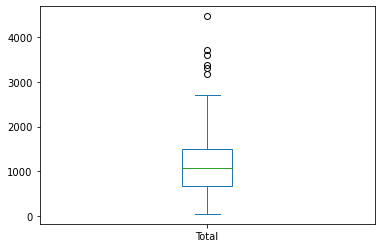

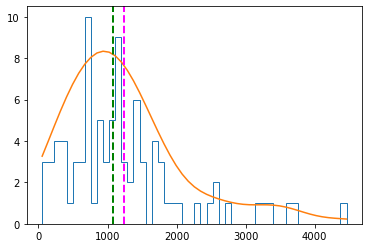

In [11]:
#membuat visualisasi boxplot
ewallet.Total.plot(kind='box')
plt.show()

total = ewallet.Total
#membuat density kernel distribution
density = stats.gaussian_kde(total)
#membuat variable n & x yang akan digunakan untukk ploting kde
n, x, _ = plt.hist(total, histtype='step', bins=50)  
plt.plot(x, density(x)*10*1550)
plt.axvline(total.mean(), color='magenta', linestyle='dashed', linewidth=2)
plt.axvline(total.median(), color='green', linestyle='dashed', linewidth=2)
plt.show()

- Data cash

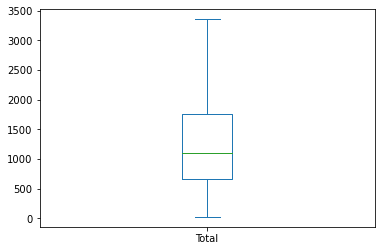

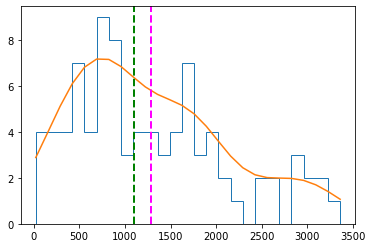

In [25]:
#membuat visualisasi boxplot
cash.Total.plot(kind='box')
plt.show()

total = cash.Total
#membuat density kernel distribution
density = stats.gaussian_kde(total)
#membuat variable n & x yang akan digunakan untukk ploting kde
n, x, _ = plt.hist(total, histtype='step', bins=25)  
plt.plot(x, density(x)*10*1500)
plt.axvline(total.mean(), color='magenta', linestyle='dashed', linewidth=2)
plt.axvline(total.median(), color='green', linestyle='dashed', linewidth=2)
plt.show()

- Data Credit Card

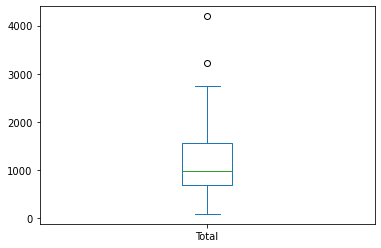

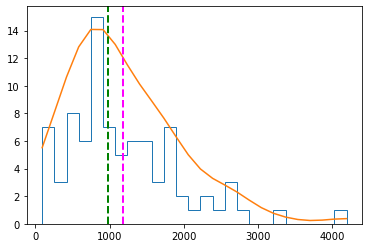

In [29]:
#membuat visualisasi boxplot
credit.Total.plot(kind='box')
plt.show()

total = credit.Total
#membuat density kernel distribution
density = stats.gaussian_kde(total)
#membuat variable n & x yang akan digunakan untukk ploting kde
n, x, _ = plt.hist(total, histtype='step', bins=25)  
plt.plot(x, density(x)*10*2500)
plt.axvline(total.mean(), color='magenta', linestyle='dashed', linewidth=2)
plt.axvline(total.median(), color='green', linestyle='dashed', linewidth=2)
plt.show()

In [19]:
F,p=stats.f_oneway(ewallet.Total, cash.Total, credit.Total)

print(f'p-value : {p}')

p-value : 0.7134175869022674


Setelah melakukan analisa ANOVA test, dapat disimpulkan bahwa ke-3 rata-rata dari colum peyment tidak sama satu dengan yang lainnya.
hal ini dapat dipercaya dengan hasil p=value yang lebih besar dari CI=0.05